In this notebook, we will visualize the spatial distribution of clusters generated by our climate-based hierarchical classification scheme.

In [1]:
# Load relevant packages.
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
# Read in shape file.
shp = gpd.read_file('../Final_data/districts2020.shp')

In [3]:
# Read in .csv file.
df = pd.read_csv('../Final_data/districts_clusters.csv')
print('We have data for %d unique districts.'% (len(df)))

We have data for 506 unique districts.


In [4]:
# Set up a "cluster" column of NaNs.
shp['cluster'] = np.zeros(len(shp),dtype=int)*np.NaN

In [5]:
# Assign cluster index value to districts in shape file.
for i in range(len(df)):
    shp.loc[shp['distname']==df.iloc[i]['Dist.Name'], 'cluster'] = int(df.iloc[i]['Cluster'])

In [6]:
shp.sample(5, random_state=440)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,cluster
306,335,27,Maharashtra,STATE,516,Nasik,15530.0,6107187.0,1222887.0,3157186.0,2950001.0,1.775973e+10,883890.031020,"POLYGON ((74.14414 20.85456, 74.14583 20.85267...",1.0
102,155,32,Kerala,STATE,596,Idukki,4356.0,1108974.0,279812.0,552808.0,556166.0,4.515380e+09,560565.211648,"POLYGON ((77.28501 9.27265, 77.28412 9.27302, ...",6.0
547,485,21,Orissa,STATE,395,Kalahandi,7920.0,1576869.0,401251.0,787101.0,789768.0,8.975506e+09,640124.592262,"POLYGON ((82.71771 19.96906, 82.71852 19.98906...",1.0
518,551,33,Tamil Nadu,STATE,620,Thanjavur,3411.0,2405890.0,605363.0,1182416.0,1223474.0,3.572125e+09,625939.645594,"POLYGON ((79.35098 10.28563, 79.34817 10.28555...",4.0
437,641,09,Uttar Pradesh,STATE,170,Banda,4408.0,1799410.0,319963.0,965876.0,833534.0,5.609834e+09,709367.168728,"POLYGON ((80.32235 25.36447, 80.32204 25.36629...",3.0


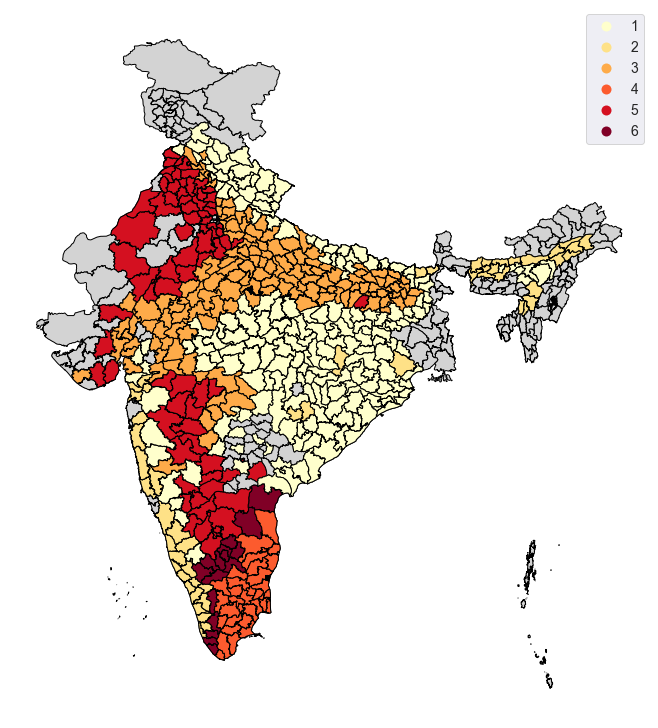

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=False, categorical=True, 
        missing_kwds={'color': 'lightgrey'})
# Show map without NaNs.
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs.cluster.astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
noNaNs.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
                  legend_kwds=legend_kwds)
# Hide axes.
ax.set_axis_off()
plt.show()

In [8]:
# Write shape file with clustering info to disk.
shp.to_file('../Final_data/districts2020_clusters.shp')